<h3>Traveling Salesperson Problem</h3>
<p> Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?
</p>

In [4]:
import numpy as np
import random as rnd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from numpy import random

In [5]:
def TravelingSalesperson(G, n, v, solutions, iterations, currPos = 0, count = 1, cost = 0):
    
    iterations[0]+=1
    if (count == n and (currPos,0) in G.edges(currPos)):
        solutions.append(cost + G.edges[currPos, 0]['weight'])
        return
 
    for i in range(n):
        iterations[0]+=1
        if (v[i] == False and (currPos,i) in G.edges(currPos)):
             
            v[i] = True
            TravelingSalesperson(G, n, v, solutions, iterations, i, count + 1, cost + G.edges[currPos, i]['weight'])
             
            v[i] = False
            
    return solutions

def BacktrackingTraveller(G):
    
    solutions = []
    iterations = [0]
    n = len(G.nodes())
    
    v = [False for i in range(n)]
    v[0] = True 
    
    TravelingSalesperson(G, n, v, solutions, iterations)
    
    best_weight = float('inf')
    for weight in solutions:
        iterations[0]+=1
        if weight < best_weight:
            best_weight = weight
    
    return best_weight, iterations[0]

In [6]:
def BruteTraveller(graph):
    
    iterations = [0]
    G = graph.copy()
    
    allSubsets = []
    AllSubsets(G.edges(), np.zeros(len(G.edges()), dtype=int),len(G.nodes()), allSubsets, iterations)
    
    best_weight = float('inf')
    
    for sub in allSubsets:
        valid, weight, it = CheckSolution(sub,G)
        iterations[0] = iterations[0] + it + 1
        if valid is True:
            if weight < best_weight:
                best_weight = weight
    
    return best_weight, iterations[0]
               
def AllSubsets(w, x, n, allSets, iterations, index=0):
    
    iterations[0]+=1
    if(index == len(w)):
        edge,it = (GetSet(w,x))
        iterations[0] = iterations[0] + it
        if len(edge) == n:
            allSets.append(edge)
    else:
        x[index] = 0
        AllSubsets(w, x,n, allSets, iterations, index+1)
        x[index] = 1
        AllSubsets(w, x,n, allSets, iterations, index+1)
    
    return allSets

def GetSet(w, x):
    it = 0
    setW = []
    for edge in w:
        if x[it] == 1:
            setW.append(edge)
        it+=1
    return setW,it

def CheckSolution(ans, G):
    
    iterations = 0
    if len(ans) < 1:
        return False, -1, iterations
    
    path = [ans[0]]
    weight = G.edges[ans[0]]['weight']
    
    # follow the path until the end
    for i in range (1, len(ans)):
        iterations+=1
        for j in range(i, len(ans)):
            iterations+=1
            if ans[i] not in path:
                if ans[i][0] == path[-1][0] or ans[i][0] == path[-1][1]:
                    path.append(ans[i])
                    weight = weight + G.edges[ans[i]]['weight']
                elif ans[i][1] == path[-1][0] or ans[i][1] == path[-1][1]:
                    path.append(ans[i])
                    weight = weight + G.edges[ans[i]]['weight']

    if(len(path) != len(ans)):
        return False, -1, iterations
    
    times_visited = {}
    for z in G.nodes():
        iterations+=1
        times_visited[z] = 0

    for i in range (0, len(path)):
        iterations+=1
        times_visited[path[i][0]]+=1
        times_visited[path[i][1]]+=1
        if times_visited[path[i][0]] > 2 or times_visited[path[i][1]] > 2:
            return False, -1, iterations
    
    return True, weight, iterations

In [7]:
def PrintGraph(G,be,bn,re=[],rn=[]):
    
    node_pos=nx.get_node_attributes(G,'pos')
    arc_weight=nx.get_edge_attributes(G,'weight')

    nx.draw_networkx_nodes(G, node_pos, nodelist=rn, cmap=plt.get_cmap('jet'),node_color = "#FF9A00", node_size = 500)
    nx.draw_networkx_nodes(G, node_pos, nodelist=bn, cmap=plt.get_cmap('jet'),node_color = "#cacaca", node_size = 500)
    nx.draw_networkx_labels(G, node_pos)
    nx.draw_networkx_edges(G, node_pos, edgelist=re, edge_color='#FF9A00', arrows=False)
    nx.draw_networkx_edges(G, node_pos, edgelist=be, edge_color='black', arrows=False)
    nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)
    plt.tight_layout()
    plt.axis('off')
    plt.show()

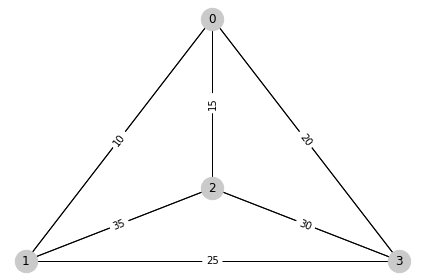

In [8]:
G1=nx.DiGraph()

G1.add_node(0,pos=(0,0))
G1.add_node(1,pos=(-1,-1))
G1.add_node(2,pos=(0,-0.7))
G1.add_node(3,pos=(1,-1))

list_arcs = [(0, 1, 10),(0, 2, 15),(0, 3, 20),(1, 0, 10),(1, 2, 35),(1, 3, 25),
    (2, 0, 15),(2, 1, 35),(2, 3, 30),(3, 0, 20),(3, 1, 25),(3, 2, 30)]
G1.add_weighted_edges_from(list_arcs)

PrintGraph(G1,G1.edges(),G1.nodes())

In [9]:
answer, iterations = BacktrackingTraveller(G1)
print("The answer is " + str(answer) + " with " + str(iterations) + " iterations.")

The answer is 80 with 62 iterations.


In [10]:
answer, iterations = BruteTraveller(G1)
print("The answer is " + str(answer) + " with " + str(iterations) + " iterations.")

The answer is 80 with 64601 iterations.


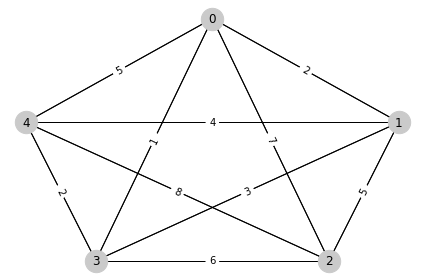

In [11]:
G2=nx.DiGraph()

G2.add_node(0,pos=(0,0.5))
G2.add_node(1,pos=(0.8,-1))
G2.add_node(2,pos=(0.5,-3))
G2.add_node(3,pos=(-0.5,-3))
G2.add_node(4,pos=(-0.8,-1))

list_arcs = [(0,1,2),(0,2,7),(0,3,1),(0,4,5),(1,2,5),(1,3,3),(1,4,4),(2,3,6),(2,4,8),
     (3,4,2),(1,0,2),(2,0,7),(3,0,1),(4,0,5),(2,1,5),(3,1,3),(4,1,4),(3,2,6),(4,2,8),(4,3,2)]
G2.add_weighted_edges_from(list_arcs)

PrintGraph(G2,G2.edges(),G2.nodes())

In [12]:
answer, iterations = BacktrackingTraveller(G2)
print("The answer is " + str(answer) + " with " + str(iterations) + " iterations.")

The answer is 18 with 294 iterations.


In [13]:
answer, iterations = BruteTraveller(G2)
print("The answer is " + str(answer) + " with " + str(iterations) + " iterations.")

The answer is 18 with 23329285 iterations.


In [20]:
x = [3,4]        # Different input sizes
samples = 10        # Quantity of samples to be averaged
backtracking = []    # Quantity of iterations - Backtracking approach
brute_force = []     # Quantity of iterations - Brute force approach

In [21]:
# Calculate the average iterations of all approaches
for i in range(len(x)):
    
    it1, it2 = 0,0
    iterations1, iterations2 = 0,0
    
    for k in range (0,samples):
        
        G1.clear()
        G2.clear()
        G1=nx.DiGraph()
        
        list_arcs = []
        for x1 in range(x[i]):
            for x2 in range(x[i]):
                if x1 != x2:
                    list_arcs.append((x1,x2,random.randint(100)))
        
        G1.add_weighted_edges_from(list_arcs)
        G2 = G1.copy()
        
        answer1, iterations1 = BruteTraveller(G2)
        answer2, iterations2 = BacktrackingTraveller(G1)
        
        it1 = it1 + iterations1
        it2 = it2 + iterations2
    
    brute_force.append(it1/samples)
    backtracking.append(it2/samples)

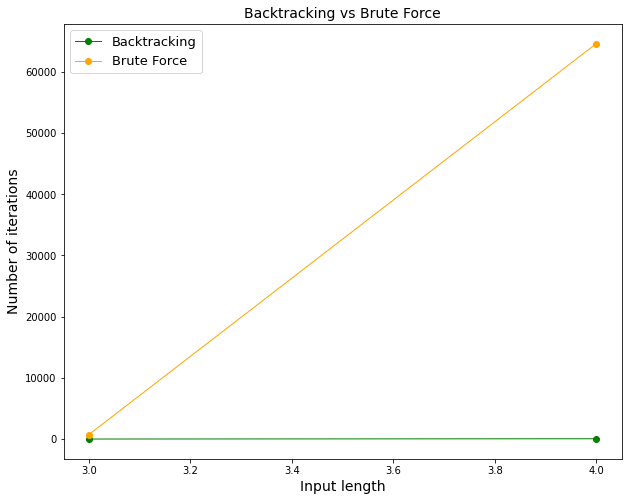

In [22]:
# Plots the complexity graph
plt.figure(figsize=(10, 8))
plt.plot(x,backtracking, c="green", ls="-", lw = 1, marker="o", label="Backtracking")
plt.plot(x,brute_force, c="orange", ls="-",  lw = 1, marker="o", label="Brute Force")
plt.title("Backtracking vs Brute Force",fontsize=14)
plt.xlabel("Input length",fontsize=14)
plt.ylabel("Number of iterations",fontsize=14)
plt.legend(fontsize=13)
plt.show()